In [1]:
import os
# import drjit
gpu_num = 1 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
import pickle
import jammer
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')

from jammer.simulation_model import *
from jammer.utils import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy

(64, 14)


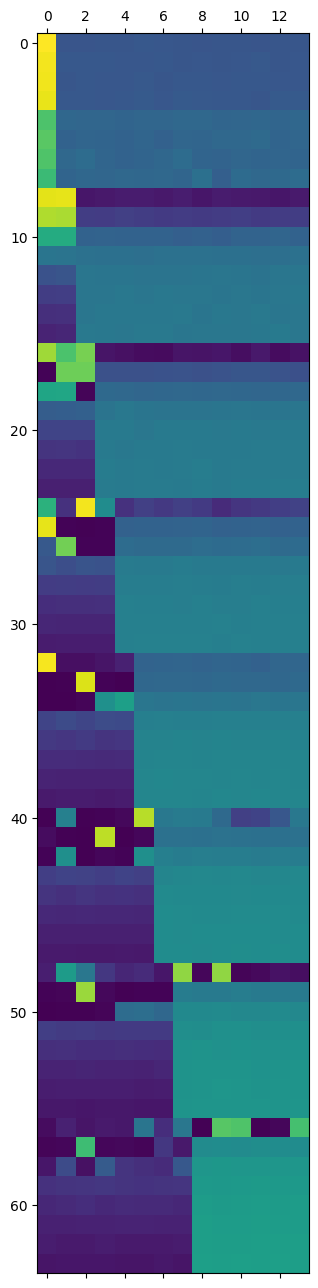

In [14]:
savename = "bers/paper/learning/grid_weights.csv"
num_ut = range(1, 9)
jammer_power = np.arange(-2.5, 15.1, 2.5, dtype=np.float32)
data = np.zeros((len(num_ut) * len(jammer_power), 14))
for i in range(len(num_ut)):
    for j in range(len(jammer_power)):
        n = num_ut[i]
        p = jammer_power[j]
        filename = f"weights/unmitigated/grid/ue_{n}_power_{p}dB.pickle"
        with open(filename, 'rb') as f:
            weights = pickle.load(f)[1]
        weights = MaxMeanSquareNorm()(weights)
        power_weights = np.square(np.abs(weights))
        data[i * len(jammer_power) + j, :] = weights[:,0]
data /= np.max(data)
print(data.shape)
plt.matshow(data)
np.savetxt(savename, data, delimiter=",")

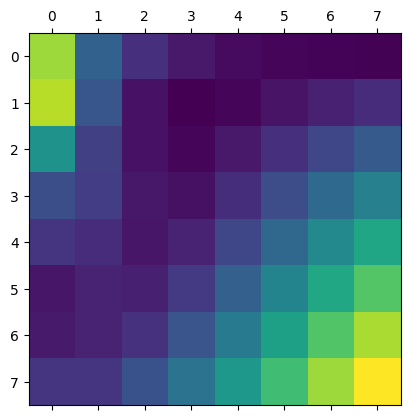

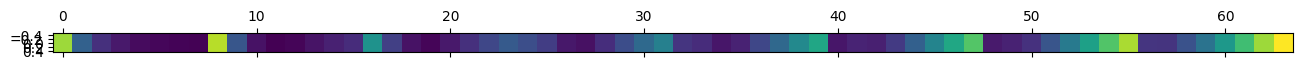

: 

In [46]:
# these are in same format as above (num_ut, jammer_power)
savename = "bers/paper/learning/grid_snr_comparison.csv"
with open("bers/report/learning/grid_snrs.pickle", "rb") as f0:
    bers_learned = pickle.load(f0)
with open("bers/report/learning/grid_snrs_uniform_jammer.pickle", "rb") as f1:
    bers_uniform = pickle.load(f1)

q = bers_learned / bers_uniform
plt.matshow(q)
q = q.flatten()
plt.matshow(q[np.newaxis,:])
# round to 2 decimal places
# q = np.round(q, 2)
# add indices
q = np.stack([np.arange(1, 65), q], axis=1)

np.savetxt(savename, q, delimiter=",", fmt='%.2f')

In [4]:
from pathlib import Path
exclude_list = [] #['bers/report/singular_values.pickle']
files = Path('bers/paper').glob('**/*.pickle')
for f in files:
    if str(f) not in exclude_list:
        print(f)

bers/paper/singular_values.pickle
bers/paper/time_pos_umi_nr_est_4ue.pickle
bers/paper/frequency/jammer_velocity_mitigation.pickle
bers/paper/frequency/mitigation_dim.pickle
bers/paper/frequency/ut_velocity_mitigation.pickle
bers/paper/frequency/mitigation_bler.pickle
bers/paper/learning/unmitigated_vs_pos.pickle
bers/paper/learning/learning_gains_ber.pickle


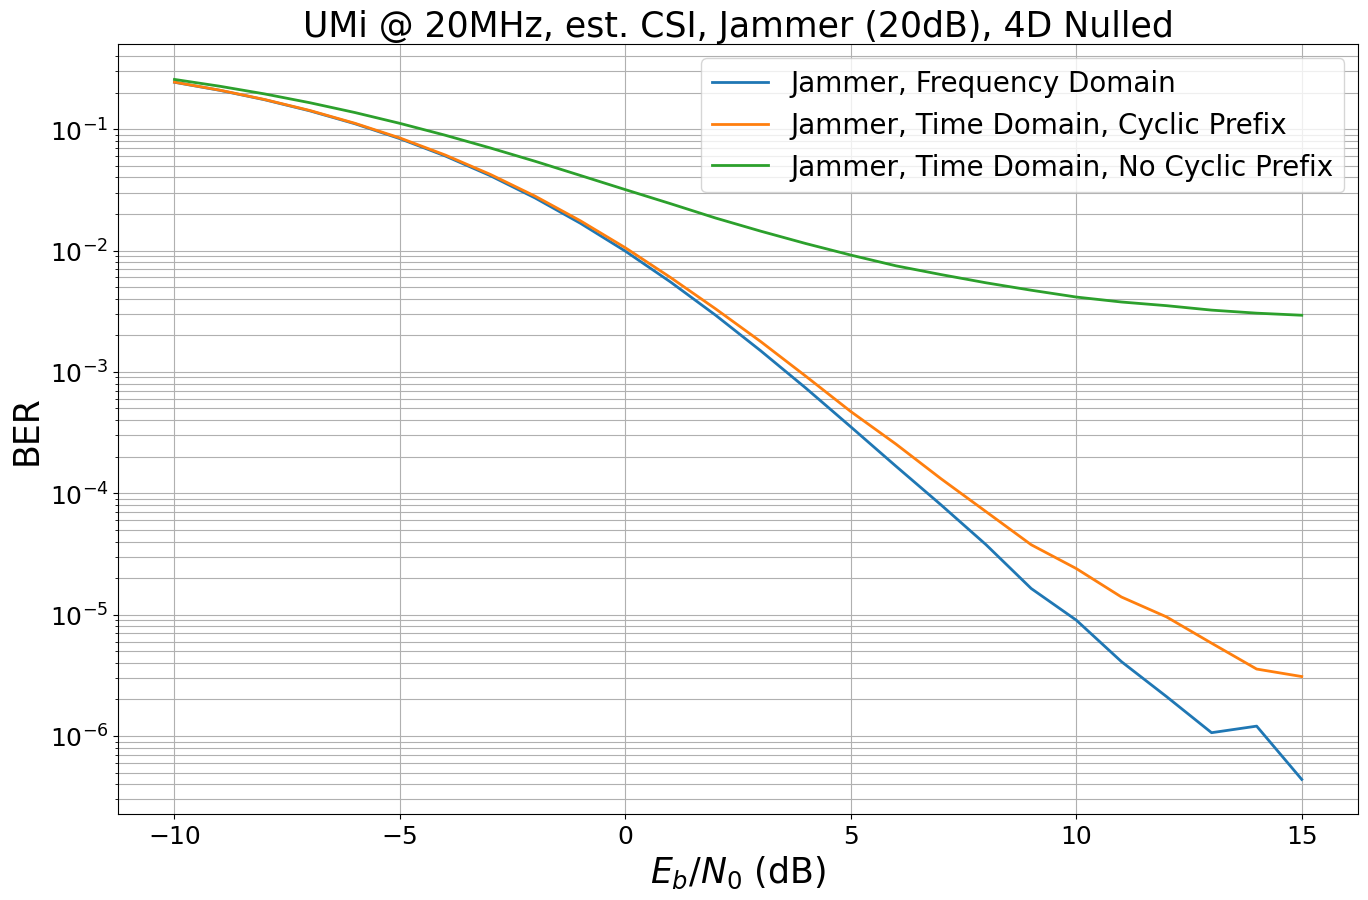

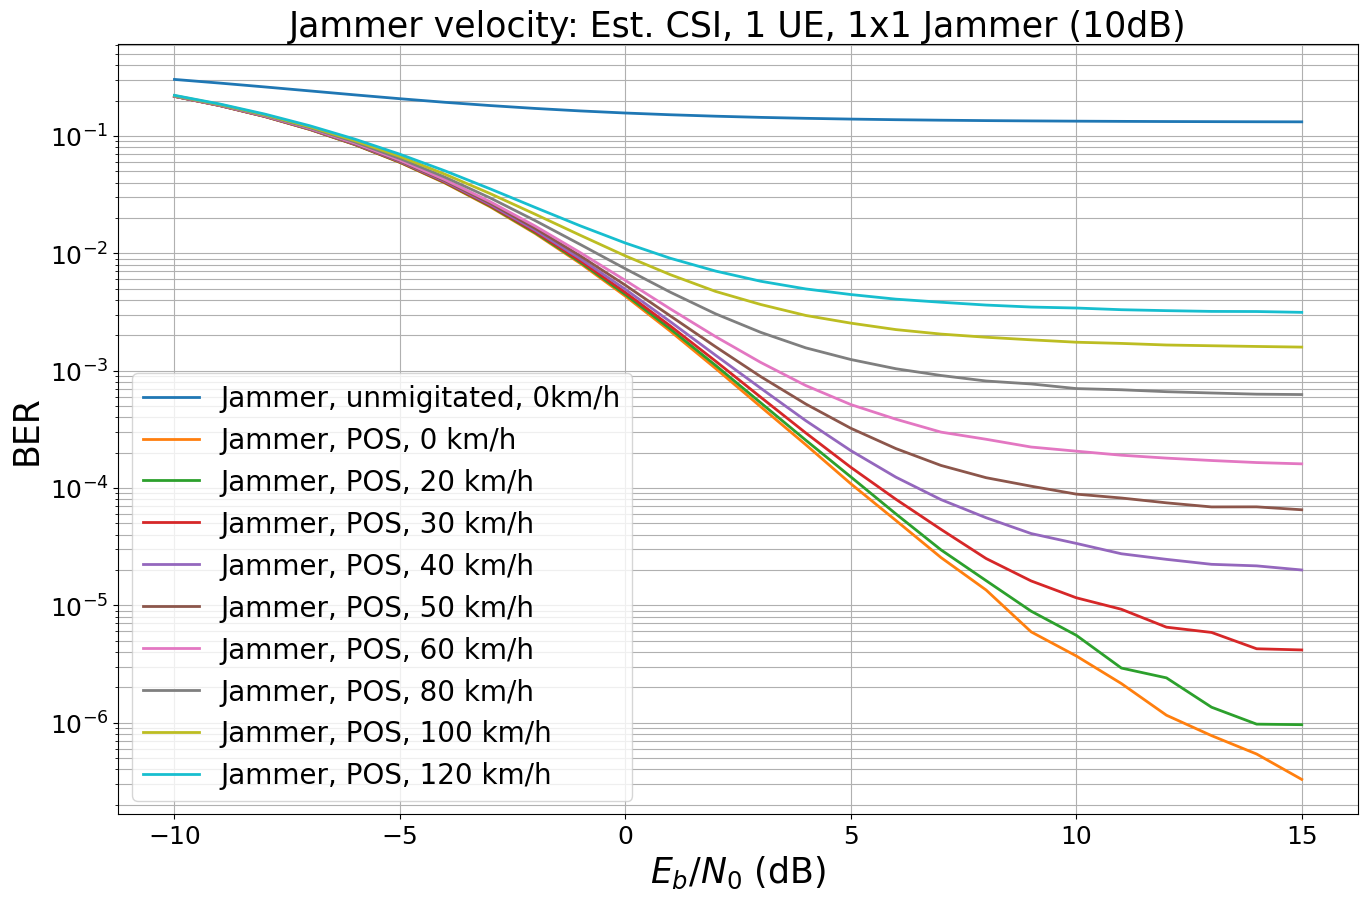

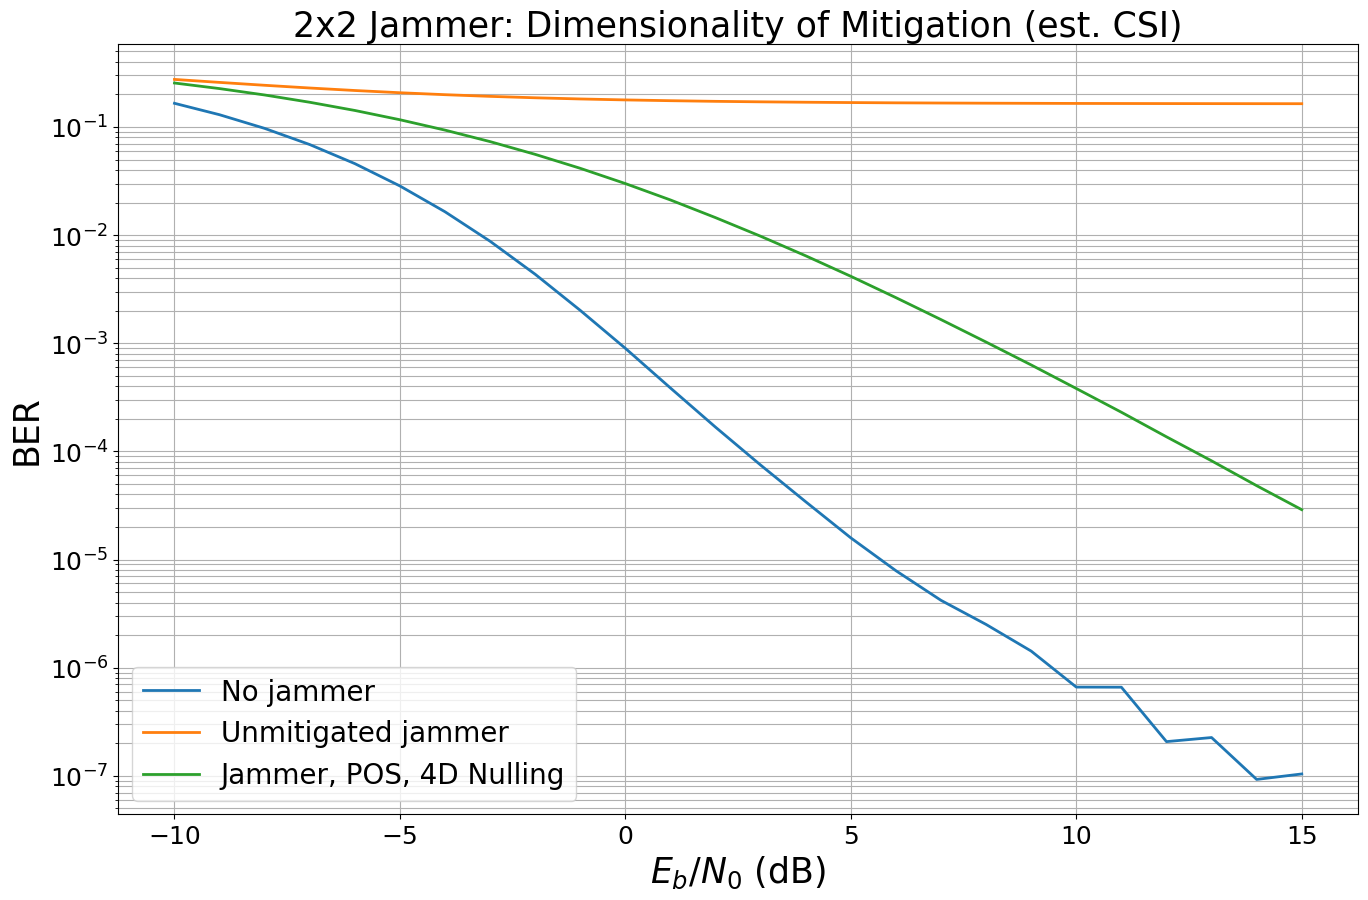

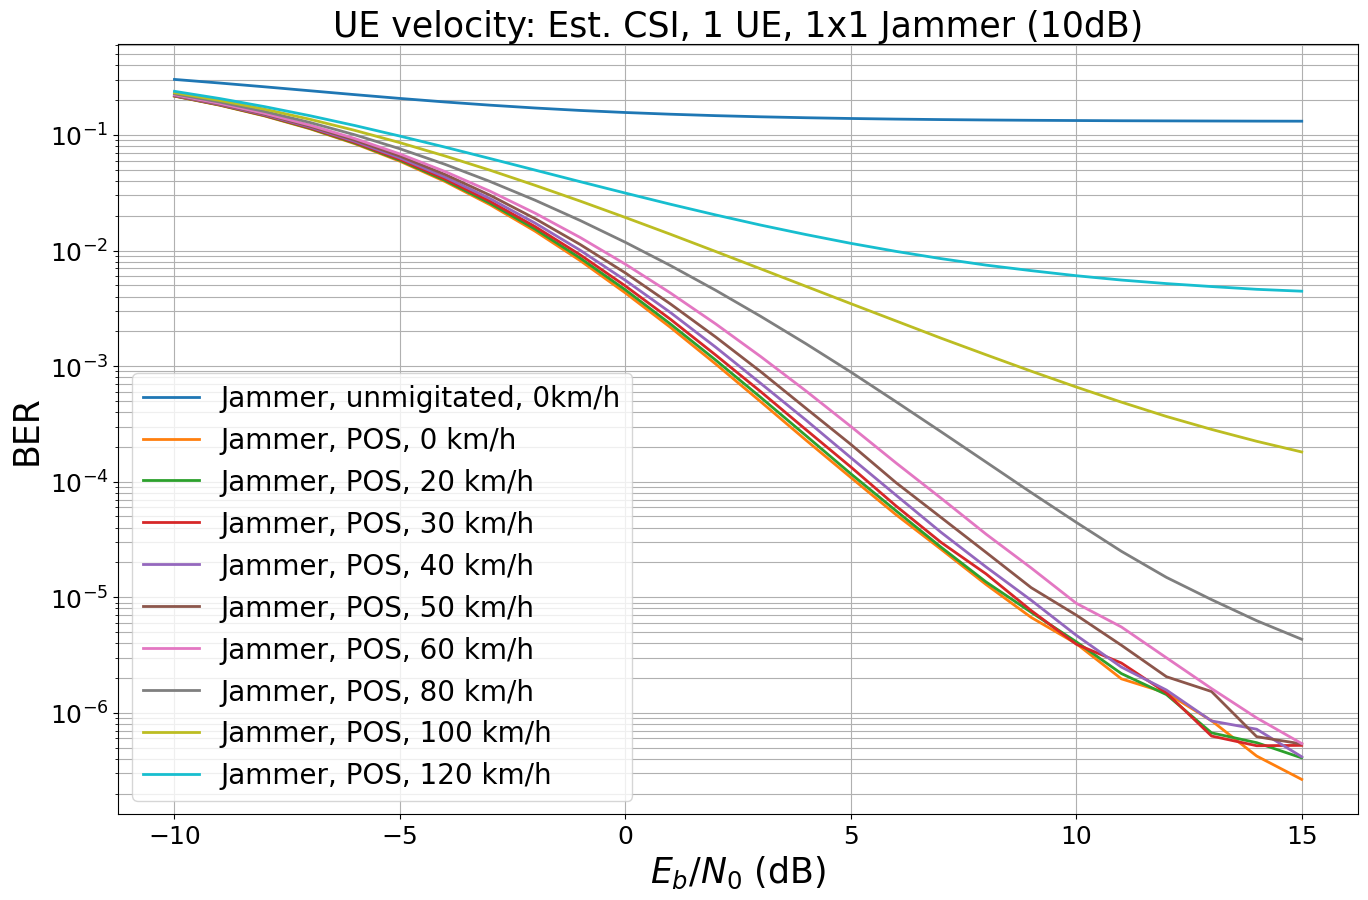

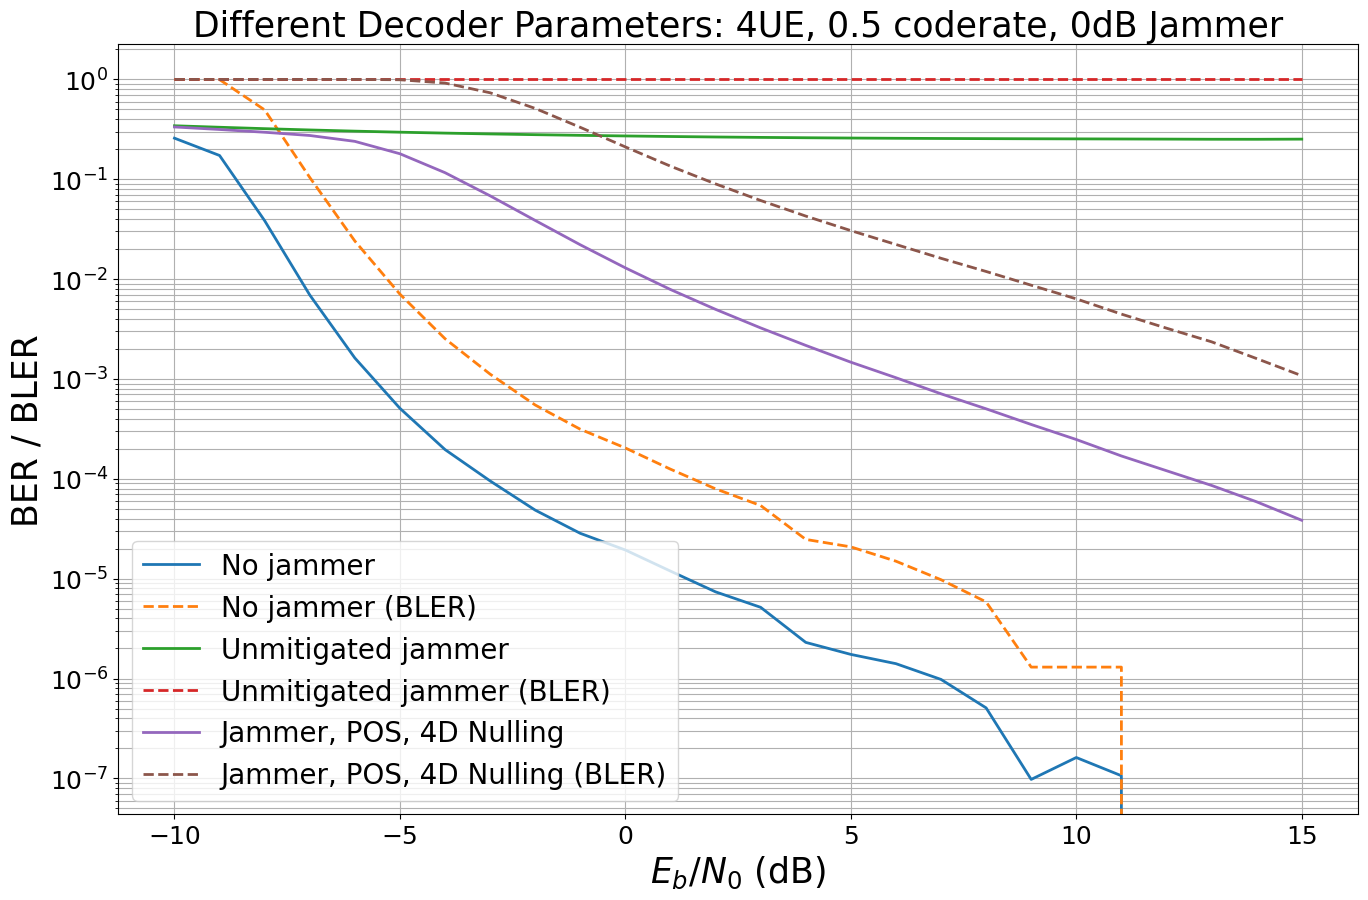

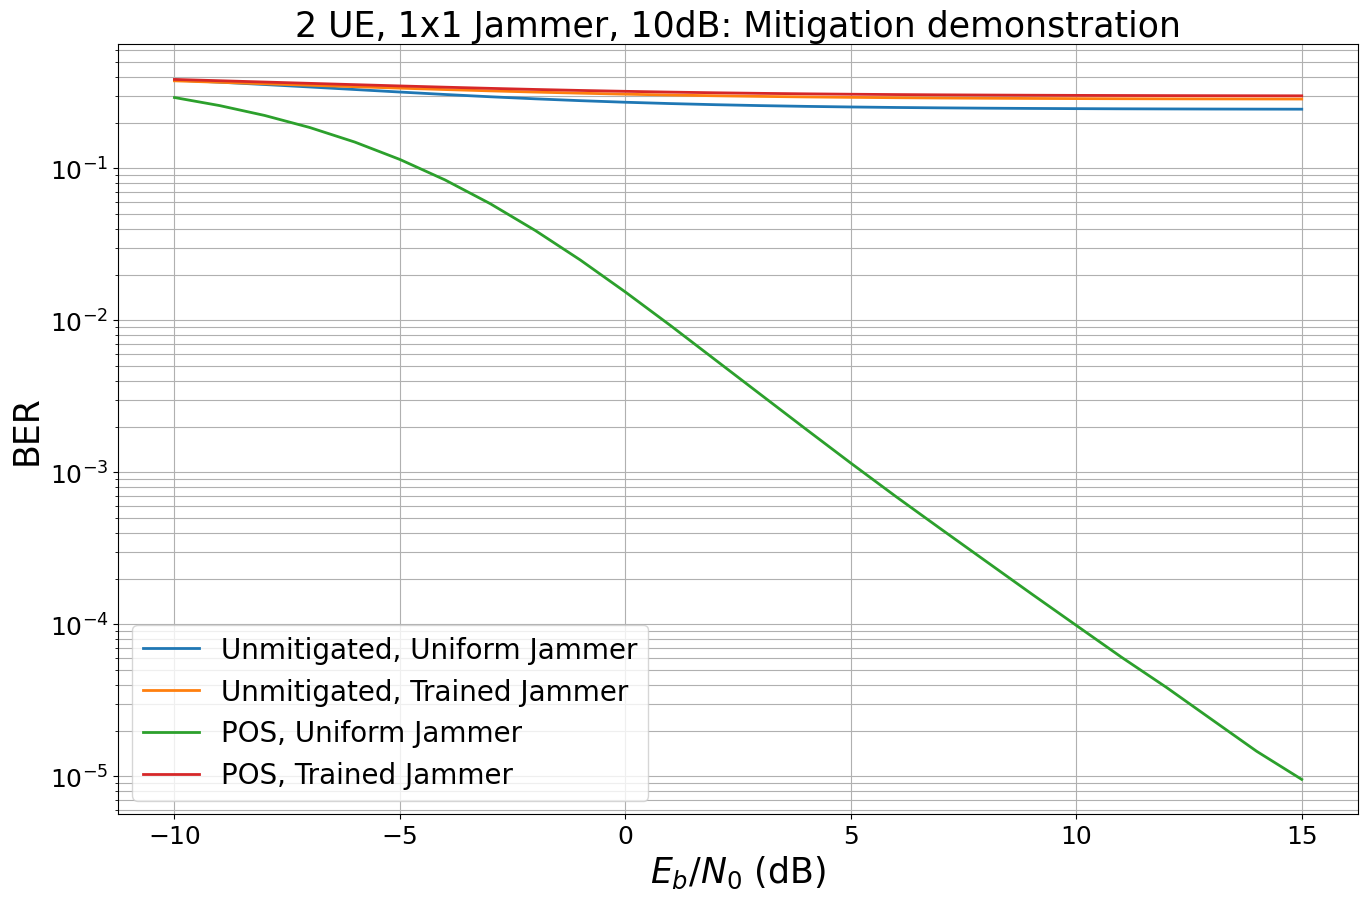

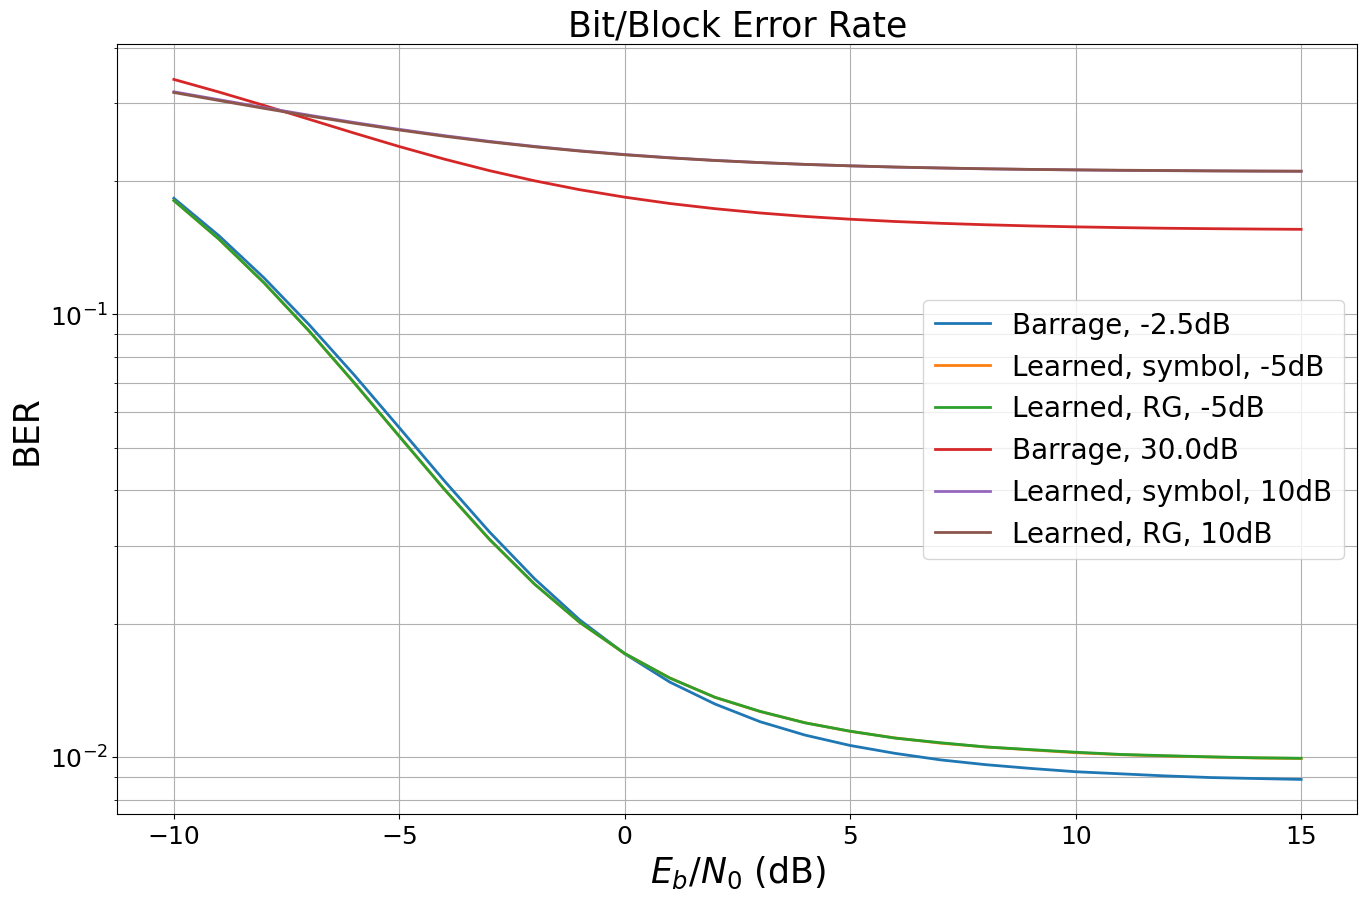

In [12]:
filenames = \
['bers/paper/time_pos_umi_nr_est_4ue.pickle',
'bers/paper/frequency/jammer_velocity_mitigation.pickle',
'bers/paper/frequency/mitigation_dim.pickle',
'bers/paper/frequency/ut_velocity_mitigation.pickle',
'bers/paper/frequency/mitigation_bler.pickle',
'bers/paper/learning/unmitigated_vs_pos.pickle',
'bers/paper/learning/learning_gains_ber.pickle',]

for filename in filenames:
    with open(filename, 'rb') as f:
        ber = pickle.load(f)
    ber()

In [3]:
filenames = \
['bers/paper/time_pos_umi_nr_est_4ue.pickle',
'bers/paper/frequency/jammer_velocity_mitigation.pickle',
'bers/paper/frequency/mitigation_dim.pickle',
'bers/paper/frequency/ut_velocity_mitigation.pickle',
'bers/paper/frequency/mitigation_bler.pickle',
'bers/paper/learning/unmitigated_vs_pos.pickle',
'bers/paper/learning/learning_gains_ber.pickle',]

from convert_to_csv import plotber_pickle_to_csv

plotber_pickle_to_csv(filenames[0])
plotber_pickle_to_csv(filenames[1])
plotber_pickle_to_csv(filenames[2])
plotber_pickle_to_csv(filenames[3])
plotber_pickle_to_csv(filenames[5])

In [10]:
f = "bers/paper/singular_values.pickle"
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, "rb") as f:
    data = pickle.load(f)
print(data.keys())
new_data = {}
for k, v in data.items():
    mean, std = v
    new_key = k.replace(',','').replace(' ', '_')
    new_data[new_key + "_mean"] = mean
    new_data[new_key + "_std"] = std
    new_data[new_key + "_x"] = tf.math.minimum(mean, std)
from convert_to_csv import save_data
save_data("singular_values", new_data)

dict_keys(['no cp, NR', 'cp, NR'])


In [11]:
plotber_pickle_to_csv(filenames[4], save_ber=False, save_bler=True)

In [13]:
plotber_pickle_to_csv(filenames[6])